In [10]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import time

In [24]:
num_nodes = 10
max_x = 100
max_y = 100

G = nx.Graph()

nodes_list = {}
for i in range(num_nodes):
    G.add_node(i)
    nodes_list[i] = {
        'position': (random.uniform(0, max_x), random.uniform(0, max_y)),  # random (x, y) position
        'bandwidth': random.randint(1, 10),
        'mobility': random.random(),  # random value between 0 and 1
        'transmission_power': random.uniform(5, 20),  # random value between 5 and 20
        'packet_loss': random.uniform(0, 1),  # random value between 0 and 1
        'battery_capacity': random.uniform(10, 100),  # random value between 10 and 100
    }

for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        if np.random.rand() < 0.5:
            G.add_edge(i, j)

In [25]:
def bellman_ford(source, destination, G, nodes_list):
    if source == destination:
        return [source]

    # Step 1: Initialize distances and predecessor nodes
    dist = {node: float('inf') for node in nodes_list.keys()}
    dist[source] = 0
    prev = {node: None for node in nodes_list.keys()}

    # Step 2: Relax edges repeatedly
    for i in range(len(nodes_list) - 1):
        for u, v in G.edges():
            if dist[u] + (1 / nodes_list[v]['bandwidth']) < dist[v]:
                dist[v] = dist[u] + (1 / nodes_list[v]['bandwidth'])
                prev[v] = u

    # Step 3: Check for negative-weight cycles
    for u, v in G.edges():
        if dist[u] + (1 / nodes_list[v]['bandwidth']) < dist[v]:
            raise ValueError("Negative weight cycle detected")

    # Step 4: Construct the shortest path from source to destination
    path = [destination]
    node = destination
    while prev[node] is not None:
        path.insert(0, prev[node])
        node = prev[node]

    return path


In [26]:
source = 2
destination = 9
path = bellman_ford(source, destination, G, nodes_list)
print(f"Path: {path}")

Path: [2, 3, 8, 9]


In [27]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_network_graph(G, path, nodes_list):
    # Create a layout for the network graph
    pos = nx.spring_layout(G)
    
    # Draw the network graph with labels
    nx.draw(G, pos, with_labels=True)
    
    # Highlight the path taken by the routing function
    path_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth
    labels = {i: f"{i} ({nodes_list[i]['bandwidth']} Mbps)" for i in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path and bandwidth
    plt.show()


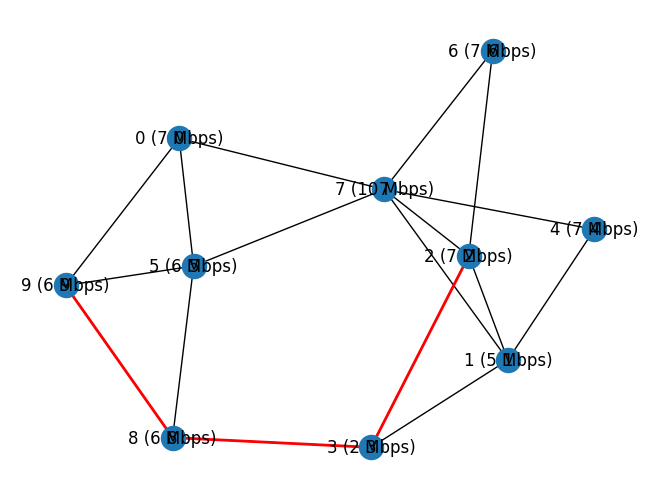

In [28]:
draw_network_graph(G, path, nodes_list)

In [29]:
import pandas as pd

# Initialize an empty list to store the rows of the DataFrame
data = []

# Iterate over the path
for i in range(len(path) - 1):
    # Get the nodes at the current and next position in the path
    node_a = path[i]
    node_b = path[i+1]

    # Get the bandwidth of the edge from node_a to node_b
    bandwidth = nodes_list[node_b]['bandwidth']

    # Append the row to the data
    data.append([node_a, node_b, bandwidth])

# Create the DataFrame
df1 = pd.DataFrame(data, columns=['node_a', 'node_b', 'bandwidth'])

df1


,node_a,node_b,bandwidth
0,2,3,2
1,3,8,6
2,8,9,6


In [51]:
df1 = df1.drop(columns = ['index'])

df1.insert(loc=0, column='index', value='Bellman Ford')
df1


,index,node_a,node_b,bandwidth
0,Bellman Ford,2,3,2
1,Bellman Ford,3,8,6
2,Bellman Ford,8,9,6


In [33]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import time

In [34]:
num_nodes = 10
max_x = 100
max_y = 100

G = nx.Graph()

nodes_list = {}
for i in range(num_nodes):
    G.add_node(i)
    nodes_list[i] = {
        'position': (random.uniform(0, max_x), random.uniform(0, max_y)),  # random (x, y) position
        'bandwidth': random.randint(1, 10),
        'mobility': random.random(),  # random value between 0 and 1
        'transmission_power': random.uniform(5, 20),  # random value between 5 and 20
        'packet_loss': random.uniform(0, 1),  # random value between 0 and 1
        'battery_capacity': random.uniform(10, 100),  # random value between 10 and 100
    }

for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        if np.random.rand() < 0.5:
            G.add_edge(i, j)

In [35]:
def dijkstra_shortest_path(source, destination, G, nodes_list):
    # Create a new graph with edge weights as the inverse of bandwidth
    G_weighted = G.copy()
    for u, v in G.edges():
        G_weighted[u][v]['weight'] = 1 / nodes_list[u]['bandwidth']

    # Apply Dijkstra's algorithm on the weighted graph
    path = nx.dijkstra_path(G_weighted, source, destination, weight='weight')
    return path


In [36]:
source = 2
destination = 9
path = dijkstra_shortest_path(source, destination, G, nodes_list)
print(f"Path: {path}")

Path: [2, 7, 9]


In [37]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_network_graph(G, path, nodes_list):
    # Create a layout for the network graph
    pos = nx.spring_layout(G)
    
    # Draw the network graph with labels
    nx.draw(G, pos, with_labels=True)
    
    # Highlight the path taken by the routing function
    path_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth
    labels = {i: f"{i} ({nodes_list[i]['bandwidth']} Mbps)" for i in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path and bandwidth
    plt.show()


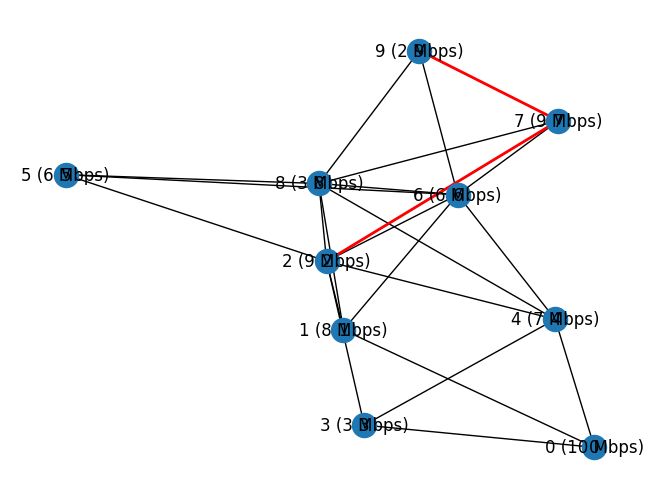

In [38]:
draw_network_graph(G, path, nodes_list)

In [39]:
import pandas as pd

# Initialize an empty list to store the rows of the DataFrame
data = []

# Iterate over the path
for i in range(len(path) - 1):
    # Get the nodes at the current and next position in the path
    node_a = path[i]
    node_b = path[i+1]

    # Get the bandwidth of the edge from node_a to node_b
    bandwidth = nodes_list[node_b]['bandwidth']

    # Append the row to the data
    data.append([node_a, node_b, bandwidth])

# Create the DataFrame
df2 = pd.DataFrame(data, columns=['node_a', 'node_b', 'bandwidth'])
df2


,node_a,node_b,bandwidth
0,2,7,9
1,7,9,2


In [52]:
df2 = df2.drop(columns = ['index'])

df2.insert(loc=0, column='index', value='Dijkstra')
df2

,index,node_a,node_b,bandwidth
0,Dijkstra,2,7,9
1,Dijkstra,7,9,2


In [42]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import time

In [43]:
num_nodes = 10
max_x = 100
max_y = 100

G = nx.Graph()

nodes_list = {}
for i in range(num_nodes):
    G.add_node(i)
    nodes_list[i] = {
        'position': (random.uniform(0, max_x), random.uniform(0, max_y)),  # random (x, y) position
        'bandwidth': random.randint(1, 10),
        'mobility': random.random(),  # random value between 0 and 1
        'transmission_power': random.uniform(5, 20),  # random value between 5 and 20
        'packet_loss': random.uniform(0, 1),  # random value between 0 and 1
        'battery_capacity': random.uniform(10, 100),  # random value between 10 and 100
    }

for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        if np.random.rand() < 0.5:
            G.add_edge(i, j)

In [44]:
def genetic_algorithm_dijkstra_shortest_path(source, destination, G, nodes_list):
    population_size = 50
    num_generations = 100
    mutation_probability = 0.1

    def generate_individual():
        return [random.randint(0, len(nodes_list)-1) for _ in range(random.randint(1, len(nodes_list)-1))]

    def calculate_fitness(individual):
        fitness = 0
        for i in range(len(individual)-1):
            start_node = individual[i]
            end_node = individual[i+1]
            fitness += 1 / nodes_list[start_node]['bandwidth']  # Use bandwidth as fitness metric
            fitness += nx.shortest_path_length(G, start_node, end_node, weight='weight')
        fitness += 1 / nodes_list[individual[-1]]['bandwidth']
        return fitness

    def selection(population):
        fitnesses = [calculate_fitness(individual) for individual in population]
        total_fitness = sum(fitnesses)
        probabilities = [fitness / total_fitness for fitness in fitnesses]
        indices = np.random.choice(range(len(population)), size=len(population), p=probabilities)
        return [population[index] for index in indices]

    def crossover(parent1, parent2):
        crossover_point = random.randint(1, min(len(parent1), len(parent2))-1)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]
        return child1, child2

    def mutation(individual):
        if random.random() < mutation_probability:
            index1 = random.randint(0, len(individual)-1)
            index2 = random.randint(0, len(nodes_list)-1)
            individual[index1] = index2

    population = [generate_individual() for _ in range(population_size)]
    for generation in range(num_generations):
        population = selection(population)
        new_population = []
        while len(new_population) < population_size:
            parent1 = random.choice(population)
            parent2 = random.choice(population)
            child1, child2 = crossover(parent1, parent2)
            mutation(child1)
            mutation(child2)
            new_population.append(child1)
            if len(new_population) < population_size:
                new_population.append(child2)
        population = new_population

    best_individual = min(population, key=calculate_fitness)
    best_path = [source] + best_individual + [destination]
    return best_path

In [45]:
source = 2
destination = 9
path = genetic_algorithm_dijkstra_shortest_path(source, destination, G, nodes_list)
print(f"Path: {path}")

Path: [2, 2, 3, 1, 8, 0, 8, 0, 8, 1, 9]


In [46]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_network_graph(G, path, nodes_list):
    # Create a layout for the network graph
    pos = nx.spring_layout(G)
    
    # Draw the network graph with labels
    nx.draw(G, pos, with_labels=True)
    
    # Highlight the path taken by the routing function
    path_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth
    labels = {i: f"{i} ({nodes_list[i]['bandwidth']} Mbps)" for i in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path and bandwidth
    plt.show()


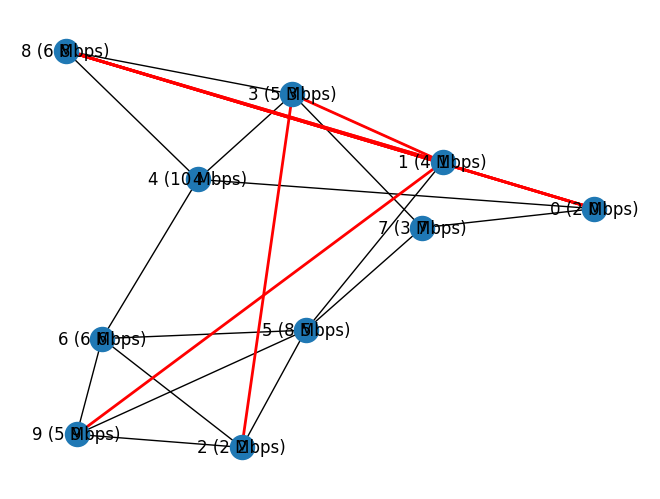

In [47]:
draw_network_graph(G, path, nodes_list)

In [48]:
import pandas as pd

# Initialize an empty list to store the rows of the DataFrame
data = []

# Iterate over the path
for i in range(len(path) - 1):
    # Get the nodes at the current and next position in the path
    node_a = path[i]
    node_b = path[i+1]

    # Get the bandwidth of the edge from node_a to node_b
    bandwidth = nodes_list[node_b]['bandwidth']

    # Append the row to the data
    data.append([node_a, node_b, bandwidth])

# Create the DataFrame
df3 = pd.DataFrame(data, columns=['node_a', 'node_b', 'bandwidth'])

df3


,node_a,node_b,bandwidth
0,2,2,2
1,2,3,5
2,3,1,4
3,1,8,6
4,8,0,2
5,0,8,6
6,8,0,2
7,0,8,6
8,8,1,4
9,1,9,5


In [53]:
df3 = df3.drop(columns = ['index'])

df3.insert(loc=0, column='index', value='Genetic')
df3

,index,node_a,node_b,bandwidth
0,Genetic,2,2,2
1,Genetic,2,3,5
2,Genetic,3,1,4
3,Genetic,1,8,6
4,Genetic,8,0,2
5,Genetic,0,8,6
6,Genetic,8,0,2
7,Genetic,0,8,6
8,Genetic,8,1,4
9,Genetic,1,9,5


In [54]:
final_df = pd.concat([df1, df2, df3], ignore_index=True)
final_df

,index,node_a,node_b,bandwidth
0,Bellman Ford,2,3,2
1,Bellman Ford,3,8,6
2,Bellman Ford,8,9,6
3,Dijkstra,2,7,9
4,Dijkstra,7,9,2
5,Genetic,2,2,2
6,Genetic,2,3,5
7,Genetic,3,1,4
8,Genetic,1,8,6
9,Genetic,8,0,2
